In [1]:
# 훈련, 검증, 테스트 폴더로 이미지 복사하기
import tensorflow as tf
import os , shutil
with tf.device('/GPU:0'):
    original_dataset_dir = './train/train'

    base_dir ='./train/dogs_cats_data'
    os.mkdir(base_dir)

    # 폴더 생성
    train_dir = os.path.join(base_dir, 'train')
    os.mkdir(train_dir)
    validation_dir = os.path.join(base_dir, 'validation')
    os.mkdir(validation_dir)
    test_dir = os.path.join(base_dir,'test')
    os.mkdir(test_dir)

    # 훈련용 고양이 사진 디렉터리
    train_cats_dir = os.path.join(train_dir, 'cats')
    os.mkdir(train_cats_dir)
    # 훈련용 강아지 사진 디렉터리
    train_dogs_dir = os.path.join(train_dir, 'dogs')
    os.mkdir(train_dogs_dir)
    # 검증용 고양이 사진 디렉터리
    validation_cats_dir = os.path.join(validation_dir, 'cats')
    os.mkdir(validation_cats_dir)
    # 검증용 강아지 사진 디렉터리
    validation_dogs_dir = os.path.join(validation_dir, 'dogs')
    os.mkdir(validation_dogs_dir)
    # 테스트용 고양이 사진 디렉터리
    test_cats_dir = os.path.join(test_dir, 'cats')
    os.mkdir(test_cats_dir)
    # 테스트용 강아지 사진 디렉터리
    test_dogs_dir = os.path.join(test_dir, 'dogs')
    os.mkdir(test_dogs_dir)

    # 처음 1000개의 고양이 이미지를 train_cats_dir에 복사
    fnames= ['cat.{}.jpg'.format(i) for i in range(1000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_cats_dir,fname)
        shutil.copyfile(src,dst)

    # 다음 500개의 고양이 이미지를 validation_cats_dir에 복사
    fnames= ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_cats_dir,fname)
        shutil.copyfile(src,dst) 

    # 다음 500개의 고양이 이미지를 test_cats_dir에 복사
    fnames= ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_cats_dir,fname)
        shutil.copyfile(src,dst)     

    # 처음 1000개의 강아지 이미지를 train_dogs_dir에 복사
    fnames= ['dog.{}.jpg'.format(i) for i in range(1000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_dogs_dir,fname)
        shutil.copyfile(src,dst)

    # 다음 500개의 강아지 이미지를 validation_dogs_dir에 복사
    fnames= ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_dogs_dir,fname)
        shutil.copyfile(src,dst)

    # 다음 500개의 강아지 이미지를 test_dogs_dir에 복사
    fnames= ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_dogs_dir,fname)
        shutil.copyfile(src,dst)

In [7]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

NameError: name 'train_cats_dir' is not defined

In [3]:
# 강아지 vs 고양이 분류를 위한 소규모 컨브넷 만들기 
from keras import layers
from keras import models

with tf.device('/GPU:0'):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64,(3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128,(3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128,(3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    # 강아지가 타깃 클래스
    model.add(layers.Dense(1, activation='sigmoid'))



Using TensorFlow backend.


In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [5]:
# 모델의 훈련 설정
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

JPEG 파일을 네트워크에 주입하기 위해서는 부동 소수 타입의 텐서로 적절하게 전처리되어야 한다.<BR>
    1. 사진 파일을 읽음 <BR>
    2. JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩 <BR>
    3. 부동 소수 타입의 텐서로 변환 <BR>
    4. 픽셀 값 (0~255)의 스케일을 [0,1] 사이로 조정 (신경망은 작은 입력 값을 선호)<BR>
    
하지만 keras 에서는 preprocessing.image 이미치처리 헬퍼 도구가  있음<br>
ImageDataGenerator 클래스는 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어주는 파이썬 제너레이터를 만듬
                          

In [7]:
#imagedatagenerator 를 사용해서 디렉터리에서 이미지 읽기 

from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, # 타깃 디렉터리
    target_size = (150,150), # 모든 이미지를 150x150 크기로 바꿈
    batch_size=20,
    class_mode='binary' # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size =20,
    class_mode ='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
# 제너레이터 출력 살펴보기
for data_batch, labels_batch in train_generator :
    print('배치 데이터 크기 :' , data_batch.shape)
    print('배치 레이블 크기 :' , labels_batch.shape)
    break

배치 데이터 크기 : (20, 150, 150, 3)
배치 레이블 크기 : (20,)


In [10]:
# 하나의 에포크를 정의하기 위해 제너레이터로부터 얼마나 많은 샘플을 뽑을 것인지 알려주어야 함
# steps_per_epoch개의 배치만큼 뽑은 후 
# steps_per_epoch 횟수만큼 경사 하강법 단계를 실행 후 다음 에포크로 넘어감

# 배치 제너레이터를 사용하여 모델 훈련
with tf.device('/GPU:0'):
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs = 30,
        validation_data = validation_generator,
        validation_steps=50)

Epoch 1/30
100/100 [==============================] - 25s 251ms/step - loss: 0.6784 - acc: 0.5660 - val_loss: 0.6818 - val_acc: 0.6180
Epoch 2/30
100/100 [==============================] - 8s 78ms/step - loss: 0.6474 - acc: 0.6315 - val_loss: 0.7452 - val_acc: 0.6540
Epoch 3/30
100/100 [==============================] - 8s 78ms/step - loss: 0.6055 - acc: 0.6875 - val_loss: 0.5309 - val_acc: 0.6540
Epoch 4/30
100/100 [==============================] - 7s 72ms/step - loss: 0.5586 - acc: 0.7155 - val_loss: 0.6281 - val_acc: 0.6860
Epoch 5/30
100/100 [==============================] - 8s 83ms/step - loss: 0.5265 - acc: 0.7370 - val_loss: 0.8505 - val_acc: 0.6000
Epoch 6/30
100/100 [==============================] - 8s 85ms/step - loss: 0.5000 - acc: 0.7520 - val_loss: 0.6606 - val_acc: 0.6870
Epoch 7/30
100/100 [==============================] - 8s 77ms/step - loss: 0.4785 - acc: 0.7750 - val_loss: 0.4978 - val_acc: 0.7030
Epoch 8/30
100/100 [==============================] - 8s 77ms/step 

In [11]:
# 모델 저장
model.save('cats_and_dogs_small_1.h5')

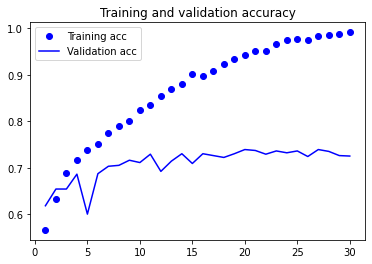

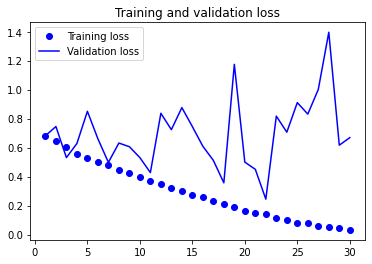

In [12]:
# 훈련 정확도와 손실 그래프 그리기 
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1 )

plt.plot(epochs, acc, 'bo', label ='Training acc')
plt.plot(epochs, val_acc, 'b', label ='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label ='Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


과대적합의 특성을 보여줌 <br>
5번의 에포크로 인하여 검증 정확도는 크게 증가하지 않았고 검증 손실은 진전되지 않았다.

<h5> 5.2.5 데이터 증식 사용하기 </h5>
학습할 샘플이 너무 적어 새로운 데이터에 일반화할 수 있는 모델을 훈련시킬 수 없기에 과대적합 발생 <br>
데이터 증식 :<br>
- 그럴듯한 이미지를 생성하도록 여러가지 랜덤한 변환을 적용하여 샘플을 늘린다. <br>
- 훈련할 때 모델이 정확히 같은 데이터를 두번 만나지 않도록 하여 여러 측면을 학습시켜 일반화에 도움이 되게 함

In [13]:
# ImageDataGenerator 를 사용하여 데이터 증식 설정
datagen = ImageDataGenerator(
    rotation_range=20, # 랜덤하게 사진을 회전시킬 각도 범위 (0~180)
    width_shift_range = 0.1, 
    height_shift_range=0.1,# 수평과 수직으로 랜덤하게 평행이동시킬 범위
    shear_range=0.1, # 전단 변화을 적용할 각도 범위
    zoom_range=0.1, # 확대할 범위 
    horizontal_flip=True, # 랜덤하게 이미지를 수평으로 뒤집는다 , 수평대칭을 가정할 수 있을시
    fill_mode='nearest' # 새롭게 생성할 픽셀을 채울 전략 
    # nearest는 인접한 픽셀을 사용
    )

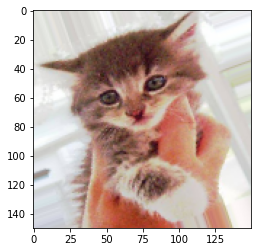

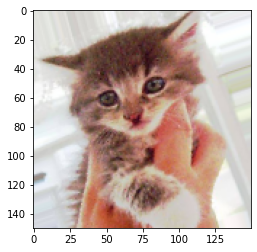

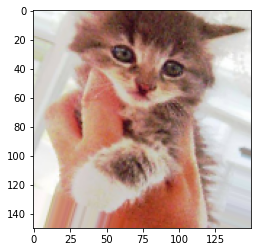

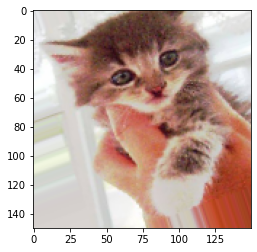

In [16]:
# 랜덤하게 증식된 훈련 이미지 그리기
from keras.preprocessing import image # 이미지 전처리 유틸리티 모듈

fnames = sorted([os.path.join(train_cats_dir,fname) for 
                 fname in os.listdir(train_cats_dir)])

img_path = fnames[3] # 증식할 이미지를 선택

img = image.load_img(img_path, target_size = (150,150)) # 이미지를 읽고 크기를 변경

x = image.img_to_array(img) # 150,150,3 크기의 넘파이 배열로 변환
x = x.reshape((1,) + x.shape) # 1, 150,150, 3 크기로 변환

i = 0
# 랜덤하게 변환된 이미지 배치를 생성
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 ==0 :
        break;

plt.show()

In [3]:
# 데이터 증식을 사용하여 네트워크를 훈련 시키면 네트워크에 같은 입력 데이터가 두번 주입되지 않음
# 적은 데이터라서 여전히 입력 데이터들 사이에 상호 연관성이 커서 드롭아웃층도 추가

# 드롭아웃을 포함한 새로운 컨브넷 정의
import tensorflow as tf
import os , shutil
from keras import layers
from keras import models
with tf.device('/GPU:0'):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64,(3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128,(3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128,(3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5)) #드롭아웃 층 추가
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [9]:
    original_dataset_dir = './train/train'

    base_dir ='./train/dogs_cats_data'  
    
    train_dir = os.path.join(base_dir, 'train')
    validation_dir = os.path.join(base_dir, 'validation')
    test_dir = os.path.join(base_dir,'test')
    # 훈련용 고양이 사진 디렉터리
    train_cats_dir = os.path.join(train_dir, 'cats')
    # 훈련용 강아지 사진 디렉터리
    train_dogs_dir = os.path.join(train_dir, 'dogs')
    # 검증용 고양이 사진 디렉터리
    validation_cats_dir = os.path.join(validation_dir, 'cats')
    # 검증용 강아지 사진 디렉터리
    validation_dogs_dir = os.path.join(validation_dir, 'dogs')
    # 테스트용 고양이 사진 디렉터리
    test_cats_dir = os.path.join(test_dir, 'cats')
    # 테스트용 강아지 사진 디렉터리
    test_dogs_dir = os.path.join(test_dir, 'dogs')

In [10]:
# 데이터 증식 제너레이터를 사용하여 컨브넷 훈련
from keras.preprocessing.image import ImageDataGenerator
with tf.device('/GPU:0'):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40, # 랜덤하게 사진을 회전시킬 각도 범위 (0~180)
        width_shift_range = 0.2, 
        height_shift_range=0.2,# 수평과 수직으로 랜덤하게 평행이동시킬 범위
        shear_range=0.2, # 전단 변화을 적용할 각도 범위
        zoom_range=0.2, # 확대할 범위 
        horizontal_flip=True, # 랜덤하게 이미지를 수평으로 뒤집는다 , 수평대칭을 가정할 수 있을시
        )

    test_datagen = ImageDataGenerator(rescale=1./255) # 검증데이터는 증식되면 안된다.

    train_generator = train_datagen.flow_from_directory(
        train_dir, # 타깃 디렉터리
        target_size = (150,150), # 모든 이미지를 150x150 크기로 바꿈
        batch_size=32,
        class_mode='binary' # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요
    )

    validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size =32,
        class_mode ='binary')

    history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs = 100,
        validation_data =validation_generator,
        validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 75s 750ms/step - loss: 0.6914 - acc: 0.5229 - val_loss: 0.6596 - val_acc: 0.5558
Epoch 2/100
100/100 [==============================] - 51s 509ms/step - loss: 0.6732 - acc: 0.5780 - val_loss: 0.6009 - val_acc: 0.6076
Epoch 3/100
100/100 [==============================] - 50s 501ms/step - loss: 0.6659 - acc: 0.5898 - val_loss: 0.6453 - val_acc: 0.6180
Epoch 4/100
100/100 [==============================] - 47s 465ms/step - loss: 0.6517 - acc: 0.6102 - val_loss: 0.5369 - val_acc: 0.5657
Epoch 5/100
100/100 [==============================] - 45s 452ms/step - loss: 0.6258 - acc: 0.6451 - val_loss: 0.5329 - val_acc: 0.6745
Epoch 6/100
100/100 [==============================] - 59s 595ms/step - loss: 0.6156 - acc: 0.6597 - val_loss: 0.6228 - val_acc: 0.6688
Epoch 7/100
100/100 [==============================] - 59s 590ms/step - loss: 0.5983 - acc: 0.6853 -

In [11]:
# 모델 저장
model.save('cats_and_dogs_small_2.h5')

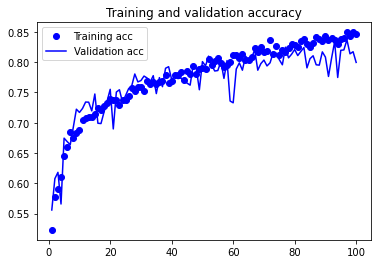

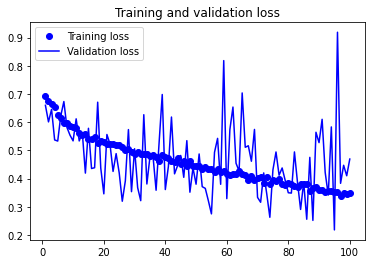

In [12]:
# 훈련 정확도와 손실 그래프 그리기 
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1 )

plt.plot(epochs, acc, 'bo', label ='Training acc')
plt.plot(epochs, val_acc, 'b', label ='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label ='Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<h2> 5.3 사전 훈련된 컨브넷 사용하기 </h2>
사전 훈련된 컨브넷 : 일반적으로 대규모 이미지 분류 문제를 위해 대량의 데이터셋에서 미리 훈련되어 저장된 네트워크 <br>
새로운 문제가 원래 작업과 완전히 다른 클래스에 대한 것이라도 많이 유용하다. <br>
학습된 특성을 다른 문제에 적용할 수 있는 이런 유연성은 딥러닝의 핵심 장점 <br><br>

VGG16 : 간단하고 ImageNet데이터셋에 널리 사용되는 컨브넷 구조 <br>
사전 훈련된 네트워크를 사용하는 두 가지 방법 <br>
1. 특성 추출 <br>
2. 미세 조정 

<h4> 특성 추출 </h4>
- 사전에 학습된 네트워크의 표현을 사용하여 새로운 샘플에서 흥미로운 특성을 뽑아내는 것 <br>
- 연속된 합성곱과 풀링 층으로 시작하여 완전 연결 분류기로 끝냄<br>
- 그 다음 사전 훈련된 네트워크의 합성곱 기반 층을 선택하여 새로운 데이터를 통과시키고 그 출력으로 새로운 분류기를 훈련<br><br>

합성곱 층만 재사용하는 이유 <br>
- 분류기에서 학습한 표현은 모델이 훈련된 클래스 집합에 특화되어 있다.(전체 사진에 어떤 클래스가 존재할 확률) <br>
- 완전 연결 층들은 공간 개념을 제거하지만 합성곱의 특성 맵은 객체 위치를 고려함

In [2]:
import tensorflow as tf
import os , shutil
from keras import layers
from keras import models

original_dataset_dir = './train/train'

base_dir ='./train/dogs_cats_data'  

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir,'test')
# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')

Using TensorFlow backend.


In [3]:
# VGG16 합성곱 기반 층 만들기
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', # 모델을 초기화할 가중치 체크포인트
                 include_top=False, # 네트워크의 최상위 완전 연결 분류기를 포함할지 안할지 지정
                 input_shape=(150,150,3)) # 네트워크에 주입할 이미지 텐서의 크기

58892288/58889256 [==============================] - 10s 0us/step


In [4]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

두 가지 방식이 사용가능하다.<br>
1. 데이터 증식을 사용하지 않는 빠른 특성 추출 <br>
- 모든 입력 이미지에 대해 합성곱 기반 층을 한번 실행하여 빠르고 비용이 적게듬<br>
2. 데이터 증식을 사용하는 특성 추출 <br>
- 준비한 모델 위에 Dense 층을 쌓아 확장 <br>

데이터 증식을 사용하지 않는 빠른 특성추출

In [5]:
# 사전 훈련된 합성곱 기반 층을 사용한 특성 추출하기
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir ='./train/dogs_cats_data'  
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir,'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4,4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size = (150,150),
        batch_size = batch_size,
        class_mode = 'binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i+1) * batch_size] = features_batch
        labels[i * batch_size : (i+1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
# 제너레이터는 루프 안에서 무한하게 데이터를 만들어 내므로 모든 이미지를 한번씩 처리하고 나면 중지함
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
# 완전 연결 분류기에 주입하기 위해서 reshape
train_features =np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000,4*4*512))

In [7]:
# 완전 연결 분류기를 정의하고 훈련
from keras import models
from keras import layers
from keras import optimizers

with tf.device('/GPU:0'):
    model = models.Sequential()
    model.add(layers.Dense(256, activation = 'relu', input_dim = 4* 4* 512))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = optimizers.RMSprop(lr=2e-5),
                 loss = 'binary_crossentropy',
                 metrics=['acc'])
    history = model.fit(train_features, train_labels,
                       epochs =30 ,
                       batch_size = 20,
                       validation_data = (validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 820us/step - loss: 0.6048 - acc: 0.6655 - val_loss: 0.4354 - val_acc: 0.8330
Epoch 2/30
2000/2000 [==============================] - 1s 502us/step - loss: 0.4271 - acc: 0.8075 - val_loss: 0.3604 - val_acc: 0.8520
Epoch 3/30
2000/2000 [==============================] - 1s 498us/step - loss: 0.3585 - acc: 0.8525 - val_loss: 0.3202 - val_acc: 0.8760
Epoch 4/30
2000/2000 [==============================] - 1s 487us/step - loss: 0.3206 - acc: 0.8640 - val_loss: 0.2974 - val_acc: 0.8850
Epoch 5/30
2000/2000 [==============================] - 1s 481us/step - loss: 0.2876 - acc: 0.8850 - val_loss: 0.2807 - val_acc: 0.8910
Epoch 6/30
2000/2000 [==============================] - 1s 489us/step - loss: 0.2634 - acc: 0.8965 - val_loss: 0.2785 - val_acc: 0.8870
Epoch 7/30
2000/2000 [==============================] - 1s 486us/step - loss: 0.2455 - acc: 0.9015 - val_loss: 0.2652 - val_acc: 0.8980


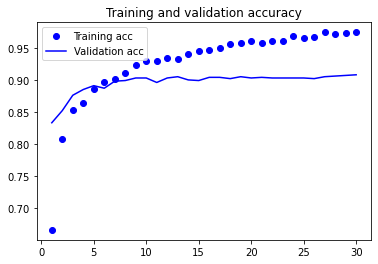

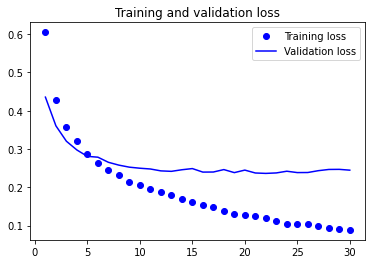

In [8]:
# 결과 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1 )

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc,'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss,'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**데이터 증식을 사용한 특성 추출** <br>


In [16]:
# 합성곱 기반 층 위에 완전 연결 분류기 추가
# 모델은 층과 동일하게 작동하여 add로 추가하면 됨

from keras import models
from keras import layers

model = models.Sequential() # 초기화
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation= 'relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))

In [17]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


모델을 컴파일하고 훈련하기 전에 합성곱 기반 층을 동결하는 것이 아주 중요 <br>
동결 : 훈련하는 동안 가중치가 업데이트되지 않도록 막는다는 뜻<br>


In [18]:
# trainable 속성을 false 로 설정하여 네트워크를 동결시킴
print ('conv_base 를 동결하기 전 훈련되는 가중치의 수: ', len(model.trainable_weights))

conv_base.trainable = False
print ('conv_base 를 동결한 후 훈련되는 가중치의 수 :', len(model.trainable_weights))

conv_base 를 동결하기 전 훈련되는 가중치의 수:  4
conv_base 를 동결한 후 훈련되는 가중치의 수 : 4


In [19]:
# 동결된 합성곱 기반 층과 함께 모델을 엔드-투-엔드로 훈련

from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
with tf.device('/GPU:0'):
    train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    width_shift_range = 0.1, 
                    height_shift_range=0.1,
                    shear_range=0.1, 
                    zoom_range=0.1, 
                    horizontal_flip=True,
                    fill_mode = 'nearest'
                    )

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
            train_dir, # 타깃 디렉터리
            target_size = (150,150), # 모든 이미지를 150x150 크기로 바꿈
            batch_size=20,
            class_mode='binary' # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요
        )

    validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size =20,
        class_mode ='binary')

    model.compile(loss='binary_crossentropy',
                 optimizer=optimizers.RMSprop(lr=2e-5),
                 metrics=['acc'])


    history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs = 30,
        validation_data =validation_generator,
        validation_steps=50,
        verbose=2 # 진행상황을 어떤 식으로 보여줄 것인지 )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
 - 30s - loss: 0.5466 - acc: 0.7435 - val_loss: 0.3561 - val_acc: 0.8300
Epoch 2/30
 - 26s - loss: 0.4106 - acc: 0.8330 - val_loss: 0.3388 - val_acc: 0.8770
Epoch 3/30
 - 27s - loss: 0.3480 - acc: 0.8625 - val_loss: 0.2359 - val_acc: 0.8800
Epoch 4/30
 - 27s - loss: 0.3240 - acc: 0.8675 - val_loss: 0.4331 - val_acc: 0.8820
Epoch 5/30
 - 28s - loss: 0.2985 - acc: 0.8810 - val_loss: 0.3859 - val_acc: 0.8880
Epoch 6/30
 - 25s - loss: 0.2822 - acc: 0.8825 - val_loss: 0.1534 - val_acc: 0.8940
Epoch 7/30
 - 27s - loss: 0.2805 - acc: 0.8830 - val_loss: 0.2663 - val_acc: 0.8980
Epoch 8/30
 - 28s - loss: 0.2633 - acc: 0.9005 - val_loss: 0.3336 - val_acc: 0.8830
Epoch 9/30
 - 28s - loss: 0.2560 - acc: 0.9000 - val_loss: 0.2511 - val_acc: 0.8980
Epoch 10/30
 - 26s - loss: 0.2488 - acc: 0.8895 - val_loss: 0.2502 - val_acc: 0.9010
Epoch 11/30
 - 28s - loss: 0.2329 - acc: 0.9125 - val_loss: 0.3960 - val_ac

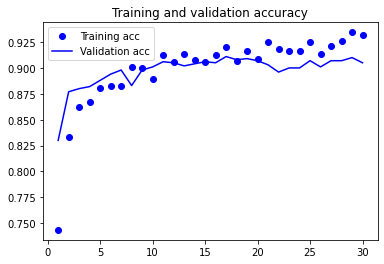

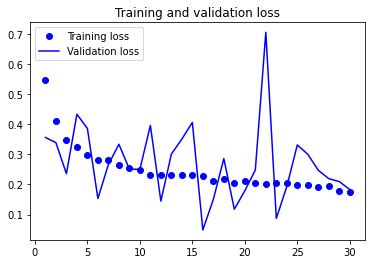

In [20]:
# 결과 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1 )

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc,'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss,'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<h3> 5.3.2 미세조정 </h3>
- 특성 추출에 사용했던 동결 모델의 상위 층 몇개를 동결에서 해제하고 모델에 새로 추가한 층과 함께 훈련하는 것 <br>

네트워크를 미세 조정하는 단계 <br>
1. 사전에 훈련된 기반 네트워크 위에 새로운 네트워크를 추가<br>
2. 기반 네트워크를 동결 <br>
3. 새로 추가한 네트워크를 훈련 <br>
4. 기반 네트워크에서 일부 층의 동결을 해제 <br>
5. 동결을 해제한 층과 새로 추가한 층을 함께 훈련

여기서는 마지막 3개의 합성곱 층을 미세조정<br>
**더 많은 층을 미세조정하지 않는 이유**<br>
 - 새로운 문제에 재활용하도록 수정이 필요한 것은 구체적인 특성이므로 이들을 미세조정하는 것이 유리<br>
 (하위 층으로 갈수록 미세 조정에 대한 효과가 감소<br>
 - 훈련해야할 파라미터가 많을수록 과대적합의 위험이 커짐

In [22]:
# 특정 층까지 모든 층 동결하기

conv_base.trainable= True

set_trainable= False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable= True
    else:
        layer.trainable =False

In [23]:
# 모델 미세 조정하기
with tf.device('/GPU:0'):
    model.compile(loss='binary_crossentropy',
                 optimizer = optimizers.RMSprop(lr=1e-5),
                 metrics=['acc'])

    history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs = 100,
            validation_data =validation_generator,
            validation_steps=50)

Epoch 1/100
100/100 [==============================] - 29s 287ms/step - loss: 0.2047 - acc: 0.9120 - val_loss: 0.4108 - val_acc: 0.9100
Epoch 2/100
100/100 [==============================] - 26s 265ms/step - loss: 0.1585 - acc: 0.9385 - val_loss: 0.4179 - val_acc: 0.9060
Epoch 3/100
100/100 [==============================] - 27s 272ms/step - loss: 0.1369 - acc: 0.9465 - val_loss: 0.0241 - val_acc: 0.9170
Epoch 4/100
100/100 [==============================] - 29s 294ms/step - loss: 0.1226 - acc: 0.9530 - val_loss: 0.1686 - val_acc: 0.9230
Epoch 5/100
100/100 [==============================] - 30s 295ms/step - loss: 0.1006 - acc: 0.9640 - val_loss: 0.2309 - val_acc: 0.9220
Epoch 6/100
100/100 [==============================] - 29s 288ms/step - loss: 0.0894 - acc: 0.9640 - val_loss: 0.1451 - val_acc: 0.9080
Epoch 7/100
100/100 [==============================] - 29s 292ms/step - loss: 0.0850 - acc: 0.9695 - val_loss: 0.0782 - val_acc: 0.9210
Epoch 8/100
100/100 [===========================

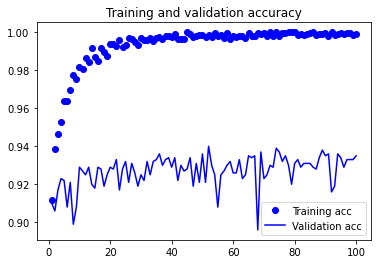

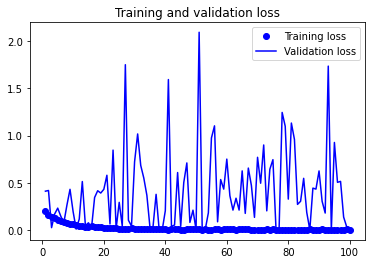

In [24]:
# 결과 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1 )

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc,'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss,'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

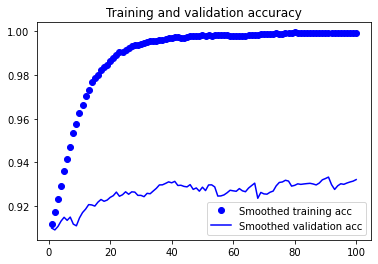

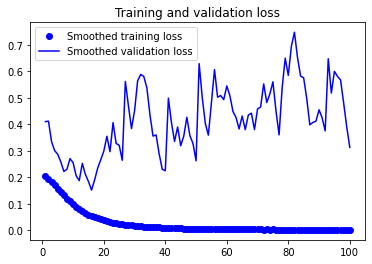

In [25]:
# 그래프를 보기 쉽게 하기 위해 지수 이동 평균으로 정확도와 손실값을 부드럽게 표현할 수 있다

def smooth_curve(points, factor=0.8):
    smoothed_points =[]
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label ='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label= 'Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label = 'Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label = 'Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

정확도는 대략 1% 이상 향상되고 , 손실은 악화되었다 <br>
이유 : <br>
- 그래프는 개별적인 손실 값의 평균을 그린 것이다. <br>
- 정확도는 모델이 예측한 클래스 확률이 어떤 임계 값을 넘었는지에 대한 결과이기 때문


In [27]:
# 모델 평가
test_generato = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode= 'binary')

test_loss, test_acc = model.evaluate_generator(test_generato, steps= 50)
print('test_acc: ', test_acc)

Found 1000 images belonging to 2 classes.
test_acc:  0.9350000023841858
